## Project Supply Chain -- First Data Exploration

Possible Questions for the Project:

Are customers happier with digital products than with physical ones?

Are customers willing to switch to digital products from physical ones when they had a positive/negative experience

**Exploration of metadata (without Text Mining technics)**
Some ideas (from Maelys):

- Response rate, influence of brand or source, verified_purchase or not

- Distribution of scores.

- Influence of the marketplace or the company on the distribution of notes (hypothesis testin could be used for  this kind of analysis )

- Information about the 10 most active users, with a small analysis on it (distribution of scores, response rate, company...).

**Goal 2 Analysis of text (and cleaning if necessary ). You will need to complete the text mining module to be able to do this part.**
Some ideas :
- Analyze the punctuation according to the note

- Analyze the length of the text (nb character, nb words...) according to the note.

- Analyze the frequency of email addresses, links, phone numbers...

- Occurrence of words, wordcloud...

- N-gram

- Occurrence of some words : delivery order, return order, delivery, SAV, customer service...

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)).replace('\\', '/')
project_path

'D:/Ling/Study/AZ_DATASCIENCE_ACADEMY/project_supply_chain'

In [17]:
data_hc = pd.read_csv(project_path + '/data/amazon_reviews_us_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_dc = pd.read_csv(project_path + '/data/amazon_reviews_us_Digital_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
data_raw = pd.concat([data_hc,data_dc], axis = 0)

C:\Users\Ling\AppData\Local\Temp\ipykernel_19720\2351948173.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_hc = pd.read_csv(project_path + '/data/amazon_reviews_us_Video_Games_v1_00.tsv', sep="\t", error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'
C:\Users\Ling\AppData\Local\Temp\ipykernel_19720\23519

### explore data

In [18]:
data_raw.shape

(1924992, 15)

In [19]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924992 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 235.0+ MB


In [20]:
data_raw.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [21]:
# check null data
print(data_raw.isnull().sum(axis = 0))

marketplace           0
customer_id           0
review_id             0
product_id            0
product_parent        0
product_title         0
product_category      0
star_rating           0
helpful_votes         0
total_votes           0
vine                  0
verified_purchase     0
review_headline      30
review_body          61
review_date          30
dtype: int64


In [22]:
# drop missing data, since the amount of missing data is very low
data = data_raw.dropna(axis = 0)

#### check data quality and clean data

In [23]:
# check duplicates
print(data["marketplace"].value_counts()) #Only data from us marketplace, so we can drop the row
print("number of duplicated customer ids = ", len(data[data['customer_id'].duplicated() == True])) #most likely because customers ordered multiple items
print("number of duplicated review ids = ", len(data[data['review_id'].duplicated() == True])) 
#has to be 0 in order to ensure the ID is unique, i think we can drop this row as well in this case
#placeholder for code that shows if product_id, product_title and product_parent are fully correlated
print("product_category: ", data["product_category"].value_counts())
print("star rating: ", data["star_rating"].value_counts())
print("vines: ",data["vine"].value_counts())
print("verified_purchases: ",data["verified_purchase"].value_counts())

US    1924871
Name: marketplace, dtype: int64
number of duplicated customer ids =  798982
number of duplicated review ids =  0
product_category:  Video Games            1780154
Digital_Video_Games     144717
Name: product_category, dtype: int64
star rating:  5    1103331
4     337771
1     216459
3     165032
2     102278
Name: star_rating, dtype: int64
vines:  N    1920587
Y       4284
Name: vine, dtype: int64
verified_purchases:  Y    1288358
N     636513
Name: verified_purchase, dtype: int64


In [24]:
# check corr
round(data.corr(),2)

,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.00,0.01,-0.05,0.05,0.05
product_parent,0.01,1.00,0.01,-0.00,-0.00
star_rating,-0.05,0.01,1.00,-0.05,-0.11
helpful_votes,0.05,-0.00,-0.05,1.00,0.95
total_votes,0.05,-0.00,-0.11,0.95,1.00


In [25]:
# drop the rows we do not need for this analysis or our model
to_drop = ["marketplace"] # "review_id", "product_id", "product_parent"
data = data.drop(to_drop, axis=1)

In [26]:
STOP

NameError: name 'STOP' is not defined

#### reviews per product

<AxesSubplot: >

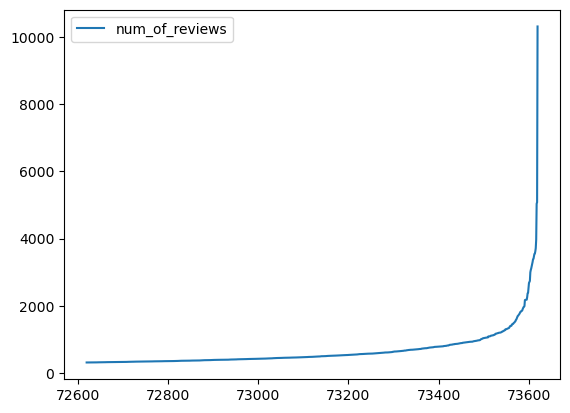

In [12]:
reviews_per_product = data.groupby(["product_id"])["review_id"].nunique().sort_values().reset_index().rename({"review_id":"num_of_reviews"}, axis=1)

reviews_per_product.tail(1000).plot()   

In [13]:
reviews_per_product["num_of_reviews"].quantile([0.01,0.1,0.25, 0.5,0.75,0.9,0.99])

0.01      1.00
0.10      1.00
0.25      1.00
0.50      4.00
0.75     15.00
0.90     51.00
0.99    382.81
Name: num_of_reviews, dtype: float64

#### countplot of various data

<AxesSubplot: xlabel='product_category', ylabel='count'>

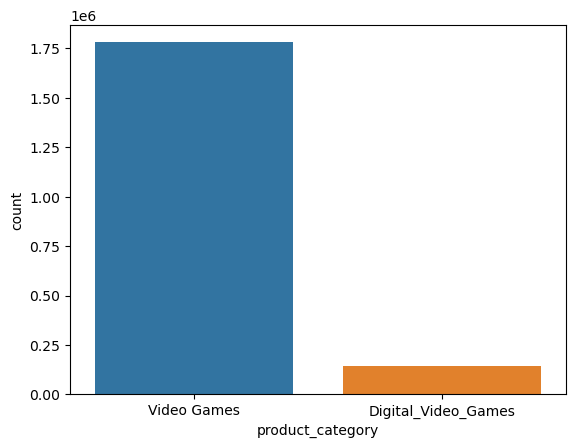

In [14]:
sns.countplot(x=data["product_category"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

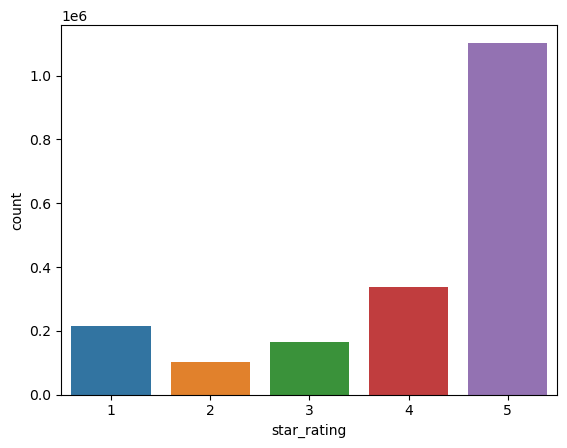

In [15]:
sns.countplot(x=data["star_rating"])

<AxesSubplot: xlabel='verified_purchase', ylabel='count'>

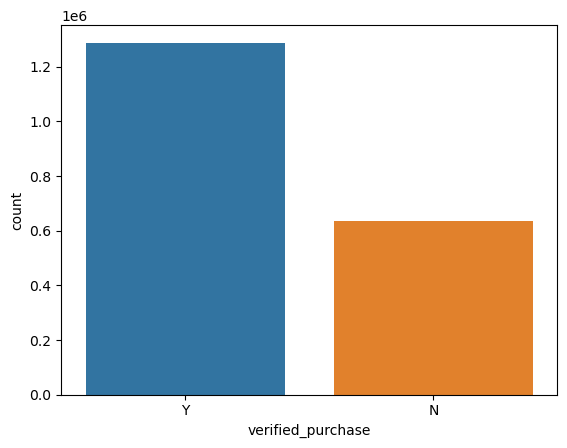

In [16]:
sns.countplot(x=data["verified_purchase"])
#there are a lot of non-verified purchases 
#let's look at how the rating distribution of these reviews looks like compared to the verified ones

<AxesSubplot: xlabel='star_rating', ylabel='count'>

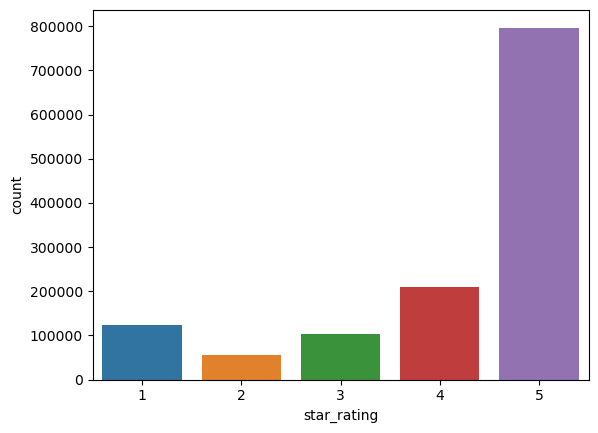

In [17]:
sns.countplot(x=data[data["verified_purchase"]=="Y"]["star_rating"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

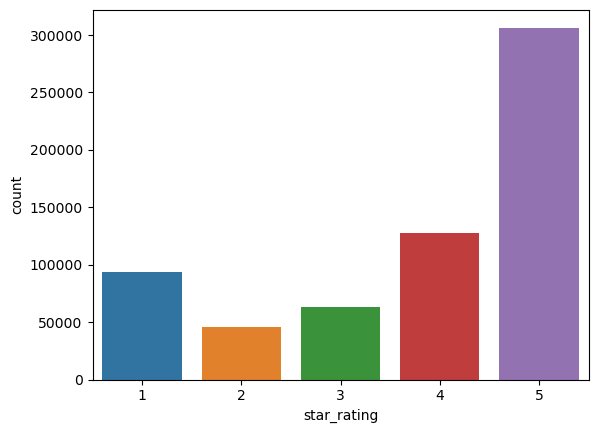

In [18]:
sns.countplot(x=data[data["verified_purchase"]=="N"]["star_rating"])
#there are a lot more lower ratings in comparison. 
#It is possible that customers were so unhappy, that they created a 2nd account just to review the game negatively again

<AxesSubplot: xlabel='star_rating', ylabel='count'>

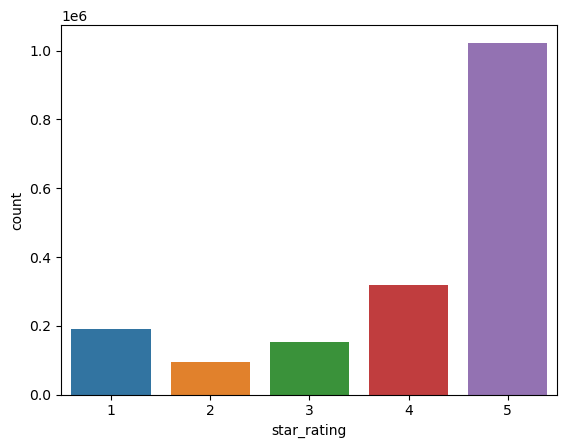

In [19]:
#there are definitely more hard-copy sales than digital sales, let's look at the ratings from the reviews for each one
sns.countplot(x=data[data["product_category"]=="Video Games"]["star_rating"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

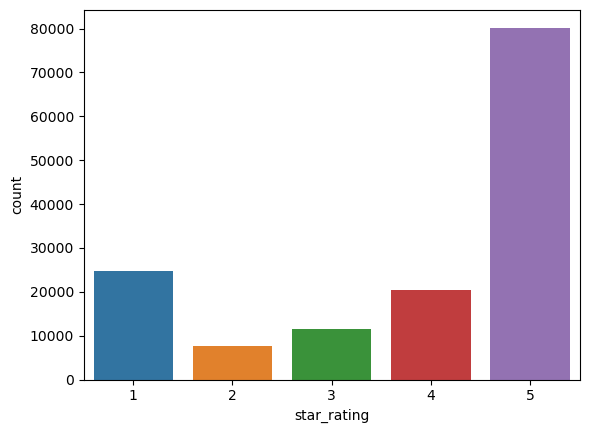

In [20]:
sns.countplot(x=data[data["product_category"]=="Digital_Video_Games"]["star_rating"])
#we can see from this simple analysis, that there are a lot more 1-star reviews for digital products

#### rating problems

In [21]:
data["rating_problems"] = data["star_rating"].apply(lambda x: False if x in [1,2,3,4,5,"1", "2", "3", "4", "5" ] else True) 
data["star_rating"].value_counts(normalize=1)
data["rating_problems"].value_counts(normalize=1)

False    1.0
Name: rating_problems, dtype: float64

In [ ]:
data = data[data["rating_problems"] != True]
data["star_rating"] = data["star_rating"].astype("int")
sns.countplot(x=data["star_rating"]) # Data is very imbalanced across classes

#### reviews over time

In [ ]:
reviews_over_time = data.groupby("review_date").agg({"review_id":"count"}).plot(kind="line")

In [ ]:
num_rev_prod_per_rating = data.groupby("star_rating").agg({"review_id":lambda x: x.nunique(), "product_id": lambda x: x.nunique()} )
num_rev_prod_per_rating["rev_per_prod"] = num_rev_prod_per_rating.apply(lambda x: x["review_id"] / x["product_id"], axis=1)
num_rev_prod_per_rating["rev_per_prod"].plot(kind="bar", title="Reviews per product")

In [ ]:
data.groupby(["star_rating", "verified_purchase"])["review_id"].count().plot(kind="bar")

#### 10 most rated titles

In [ ]:
data["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles where the reviews recieved the most votes

In [ ]:
data[["product_title", "total_votes"]].nlargest(10, ["total_votes"]).plot(x="product_title", y="total_votes", kind="barh")

#### Top 10 titles have the most 5-star reviews

In [ ]:
data[data["star_rating"] == 5]["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles with the lowest rated reviews

In [ ]:
data[data["star_rating"] == 1]["product_title"].value_counts().head(10).plot(kind="barh")
#that's where SimCity went, reviewers did not like this game at all

#### Top 10 games with the most helpful reviews

In [ ]:
data[["product_title", "helpful_votes"]].nlargest(10, ["helpful_votes"]).plot(x="product_title", y="helpful_votes", kind="barh")
#Customers found reviews of SimCity the most helpful allthough the game also had a lot of bad reviews. this again shows that this title was highly controversial

### tokenization and stemming of review_body

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()


stop_words.update(["car", "work", "product", "install"])

def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in word_tokenize(text):
        if word.lower() not in stop_words:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha(): # filter out non alphabet words like emoji
            filtered_tokens.append(token)
            
    # stemming
    # Removes ing also in anything ...
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return_string = " ".join(stems)
    
    return return_string

In [ ]:
df_review_body = data.dropna(subset=['review_body'])

In [ ]:
df_review_body["processed_reviews"] = df_review_body["review_body"].apply(lambda x: tokenization_and_stemming(x))

In [ ]:
df_review_body.head()

### word cloud of processed_reviews

In [ ]:
df_processed_reviews = data.dropna(subset="processed_reviews")
processed_review_string = df_processed_reviews.groupby("star_rating").aggregate({"processed_reviews":lambda x: " \n ".join(x)})

In [ ]:
def wc_for_rating(rating):
    wordcloud = WordCloud(collocations=True).generate(processed_review_string.loc[rating][0][1:5000000].replace("one", "").replace("use", "").replace(" br ", " ").replace("car", "").replace("work", ""))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
wc_for_rating(1)
wc_for_rating(2)
wc_for_rating(3)
wc_for_rating(4)
wc_for_rating(5)

### --- From here new: N-gram ---

In [27]:
data_raw.head(3).transpose()

,0,1,2
marketplace,US,US,US
customer_id,12039526,9636577,2331478
review_id,RTIS3L2M1F5SM,R1ZV7R40OLHKD,R3BH071QLH8QMC
product_id,B001CXYMFS,B00M920ND6,B0029CSOD2
product_parent,737716809,569686175,98937668
product_title,Thrustmaster T-Flight Hotas X Flight Stick,Tonsee 6 buttons Wireless Optical Silent Gamin...,Hidden Mysteries: Titanic Secrets of the Fatef...
product_category,Video Games,Video Games,Video Games
star_rating,5,5,1
helpful_votes,0,0,0
total_votes,0,0,1


In [28]:
data.head(3).transpose()

,0,1,2
customer_id,12039526,9636577,2331478
review_id,RTIS3L2M1F5SM,R1ZV7R40OLHKD,R3BH071QLH8QMC
product_id,B001CXYMFS,B00M920ND6,B0029CSOD2
product_parent,737716809,569686175,98937668
product_title,Thrustmaster T-Flight Hotas X Flight Stick,Tonsee 6 buttons Wireless Optical Silent Gamin...,Hidden Mysteries: Titanic Secrets of the Fatef...
product_category,Video Games,Video Games,Video Games
star_rating,5,5,1
helpful_votes,0,0,0
total_votes,0,0,1
vine,N,N,N


In [39]:
# chec na in the data
print(data.review_headline.isna().sum())
print(data.star_rating.isna().sum())
# no na data in both columns

0
0


In [40]:
# take the sample data for testing code (faster)
data_test = data.sample(frac=.1)

In [41]:
y = data_test['star_rating'].values
y.shape

(192487,)

In [42]:
x = data_test['review_headline'].values
x.shape

(192487,)

In [43]:
from sklearn.model_selection import train_test_split

(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (115492,)
y_train shape:  (115492,)
x_test shape:  (76995,)
y_test shape:  (76995,)


In [44]:
df_x_train = pd.DataFrame(x_train)
df_x_train = df_x_train.rename(columns={0:'review_headline'})

df_y_train = pd.DataFrame(y_train)
df_y_train = df_y_train.rename(columns={0:'star_rating'})

df_train = pd.concat([df_x_train,df_y_train],axis=1)

df_train.head()

,review_headline,star_rating
0,Boring,1
1,Ok but . . . meh,3
2,Final Fantasy has come a long way,5
3,Four Stars,4
4,Very Usefull,5


In [45]:
df_x_test = pd.DataFrame(x_test)
df_x_test = df_x_test.rename(columns={0:'review_headline'})

df_y_test = pd.DataFrame(y_test)
df_y_test = df_y_test.rename(columns={0:'star_rating'})

df_test = pd.concat([df_x_test,df_y_test],axis=1)

df_test.head()

,review_headline,star_rating
0,Awesome,5
1,Huge Disappointment.,1
2,one of the best games ive ever played...,5
3,Murray The Miser Owes Me Cash,5
4,Greatest Christmas gift,5


#### pre-processing

In [46]:
# remove special characters
import re

In [47]:
# define function that removes special characters
def remove_special_characters(text):
    return re.sub("[^A-Za-z]+", " ", text).strip()

In [48]:
# remove special characters in the string
df_train['review_headline_wo_punctuations']= df_train['review_headline'].apply(lambda x:remove_special_characters(x))
df_train.head()

,review_headline,star_rating,review_headline_wo_punctuations
0,Boring,1,Boring
1,Ok but . . . meh,3,Ok but meh
2,Final Fantasy has come a long way,5,Final Fantasy has come a long way
3,Four Stars,4,Four Stars
4,Very Usefull,5,Very Usefull


In [49]:
df_train[(df_train['review_headline_wo_punctuations']!= df_train['review_headline']) == True]

,review_headline,star_rating,review_headline_wo_punctuations
1,Ok but . . . meh,3,Ok but meh
6,Wii Motion Plus Controller + Fun Game = Good B...,4,Wii Motion Plus Controller Fun Game Good Buy
7,This is the best First person shooter on XBOX 360,5,This is the best First person shooter on XBOX
9,Typical New-Jack Bullcrap,1,Typical New Jack Bullcrap
11,Looks good but does not work on old PS2 model,5,Looks good but does not work on old PS model
...,...,...,...
115484,"Believe the hype, but believe the reviews too",4,Believe the hype but believe the reviews too
115485,CONTRA !!!,5,CONTRA
115486,Very happy with Call of Duty Black ops 2!,5,Very happy with Call of Duty Black ops
115488,50 games,3,games


In [50]:
df_test['review_headline_wo_punctuations']= df_test['review_headline'].apply(lambda x:remove_special_characters(x))
df_test.head()

,review_headline,star_rating,review_headline_wo_punctuations
0,Awesome,5,Awesome
1,Huge Disappointment.,1,Huge Disappointment
2,one of the best games ive ever played...,5,one of the best games ive ever played
3,Murray The Miser Owes Me Cash,5,Murray The Miser Owes Me Cash
4,Greatest Christmas gift,5,Greatest Christmas gift


In [51]:
df_test[(df_test['review_headline_wo_punctuations']!= df_test['review_headline']) == True]

,review_headline,star_rating,review_headline_wo_punctuations
1,Huge Disappointment.,1,Huge Disappointment
2,one of the best games ive ever played...,5,one of the best games ive ever played
6,"Great price, quick shipping",5,Great price quick shipping
8,Smash 3DS,5,Smash DS
15,Not like the first games.,3,Not like the first games
...,...,...,...
76979,Plug and play (just that easy),5,Plug and play just that easy
76980,The Shock is Back!,5,The Shock is Back
76987,As good as it gets..,5,As good as it gets
76988,"THIS GAME IS AWESOME, EVEN WITH THE DEMO!!",5,THIS GAME IS AWESOME EVEN WITH THE DEMO


#### remove stop words

In [52]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [190]:
# define remove stopwords function
def remove_stopwords(df, col):
    s = df[col].str.lower() # stopwords in the package are all in lower case
    for word in stopwords.words('english'):
        s = s.str.replace("\\b" + word + "\\b", " ", regex=True)
#         print(word + " ", end="")
    return s.str.replace("\\s+", " ", regex=True) # .strip()

# # define function: remove word if the length = 1
# def remove_single_word(s):
#     if len(s) <= 1:
#         return ''
#     else:
#         return s

# define generate_N_grams function
def generate_N_grams(text, ngram):
    text = text.strip()
    words = text.split(" ")
#     print(words)
    if len(words) < ngram:                  
        return '_'.join(words) 
    else: 
        temp=zip(*[words[i:] for i in range(0,ngram)])
        ans=['_'.join(word) for word in temp]
        return " ".join(ans).strip()

In [213]:
# for word in stopwords.words('english'):
#     print(word)

i
me
my
myself
we
our
ours
ourselves
you
you're
you've
you'll
you'd
your
yours
yourself
yourselves
he
him
his
himself
she
she's
her
hers
herself
it
it's
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
that'll
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
don't
should
should've
now
d
ll
m
o
re
ve
y
ain
aren
aren't
couldn
couldn't
didn
didn't
doesn
doesn't
hadn
hadn't
hasn
hasn't
haven
haven't
isn
isn't
ma
mightn
mightn't
mustn
mustn't
needn
needn't
shan
shan't
shouldn
shouldn't
wasn
wasn't
weren
weren't
won
won't
wouldn
wouldn't


In [191]:
# test function
print(generate_N_grams("Horrible Gave a great trilogy a horrible ending",2))
# print(generate_N_grams("Horrible Gave a great trilogy a horrible ending",1))
# print(*ngrams("Horrible Gave a great trilogy a horrible ending".split(" "), 2))

# remove_stopwords(df_train[df_train.star_rating==5][:5], "review_headline_wo_punctuations")
# df_train[df_train.star_rating==5][:5]['review_headline_wo_punctuations'].str.replace("\\band\\b", "")
# print(generate_N_grams(" best",2)) # _best
# print(generate_N_grams("love ",2)) # love_
generate_N_grams("awesome text", 3)

Horrible_Gave Gave_a a_great great_trilogy trilogy_a a_horrible horrible_ending


'awesome_text'

In [210]:
# Remove stopwords 
df_train['review_headline_wo_punctuations'] = remove_stopwords(df_train, 'review_headline_wo_punctuations')

#### create unigram

In [85]:
from collections import defaultdict

n_grams = 1

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [86]:
# Create string with n-grams
# get the count of every word in both the columns of df_train and df_test dataframes where star_rating=5
for text in df_train[df_train.star_rating==5].review_headline_wo_punctuations:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_5[word]+=1

In [87]:
# convert dict to df
df_rating_5 = pd.DataFrame.from_dict(rating_5, orient = 'index')
df_rating_5 = df_rating_5.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_5.tail(5)

,index,# words
11066,best,3623
11067,great,9609
11068,game,10971
11069,five,12779
11070,stars,12897


In [88]:
# Create string with n-grams
# get the count of every word in both the columns of df_train and df_test dataframes where star_rating=1
for text in df_train[df_train.star_rating==1].review_headline_wo_punctuations:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_1[word]+=1

# convert dict to df
df_rating_1 = pd.DataFrame.from_dict(rating_1, orient = 'index')
df_rating_1 = df_rating_1.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_1.tail(5)

,index,# words
5373,work,663
5374,buy,727
5375,star,1153
5376,one,1292
5377,game,1573


In [89]:
for text in df_train[df_train.star_rating==2].review_headline_wo_punctuations:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_2[word]+=1

# convert dict to df
df_rating_2 = pd.DataFrame.from_dict(rating_2, orient = 'index')
df_rating_2 = df_rating_2.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_2.tail(5)

,index,# words
3910,great,246
3911,good,344
3912,stars,391
3913,two,401
3914,game,681


In [90]:
for text in df_train[df_train.star_rating==3].review_headline_wo_punctuations:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_3[word]+=1

# convert dict to df
df_rating_3 = pd.DataFrame.from_dict(rating_3, orient = 'index')
df_rating_3 = df_rating_3.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_3.tail(5)

,index,# words
5039,great,649
5040,three,822
5041,stars,869
5042,good,1078
5043,game,1383


In [91]:
for text in df_train[df_train.star_rating==4].review_headline_wo_punctuations:
    for word in generate_N_grams(text, n_grams).split(" "):
        rating_4[word]+=1

# convert dict to df
df_rating_4 = pd.DataFrame.from_dict(rating_4, orient = 'index')
df_rating_4 = df_rating_4.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
df_rating_4.tail(5)

,index,# words
7163,four,1915
7164,stars,1976
7165,good,2585
7166,great,2698
7167,game,3784


In [92]:
#focus on more frequently occuring words for top and lowest ratings
#sort in DO wrt 2nd column in each of top and lowest ratings
df_rating_5['index'][-10:]

11061      works
11062       love
11063    awesome
11064       good
11065        fun
11066       best
11067      great
11068       game
11069       five
11070      stars
Name: index, dtype: object

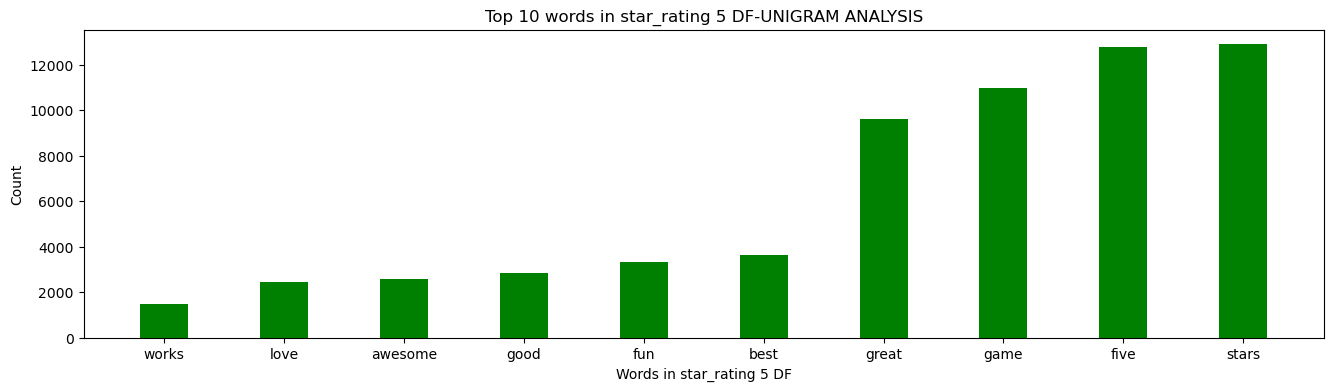

In [93]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-UNIGRAM ANALYSIS")
plt.show()

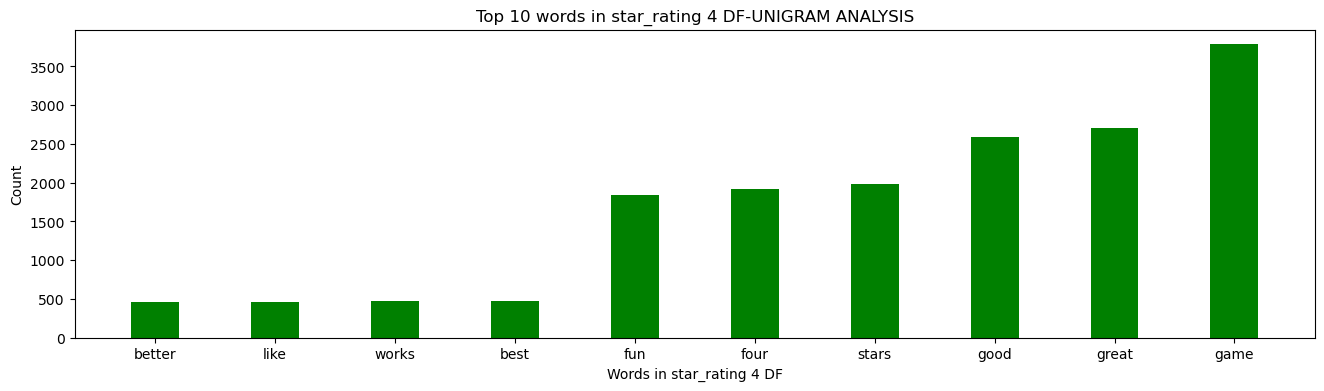

In [94]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-UNIGRAM ANALYSIS")
plt.show()

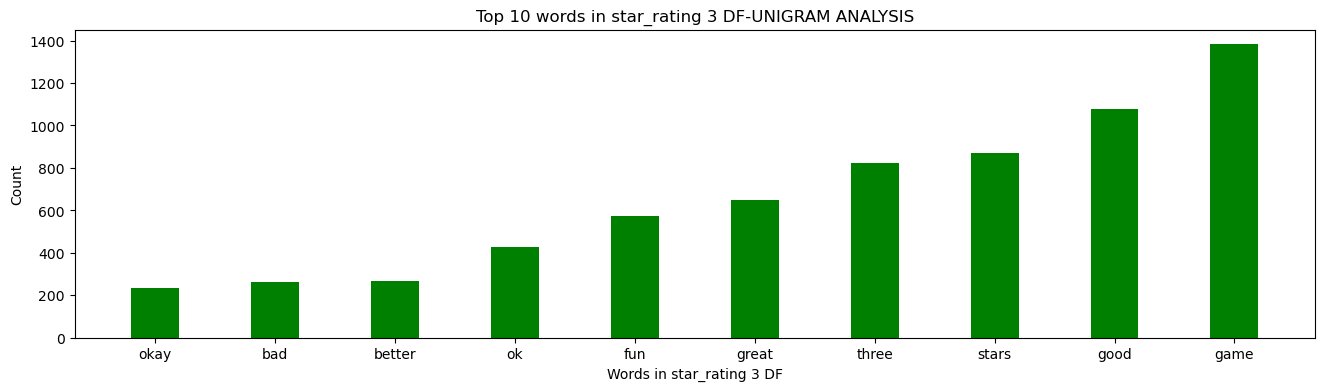

In [95]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-UNIGRAM ANALYSIS")
plt.show()

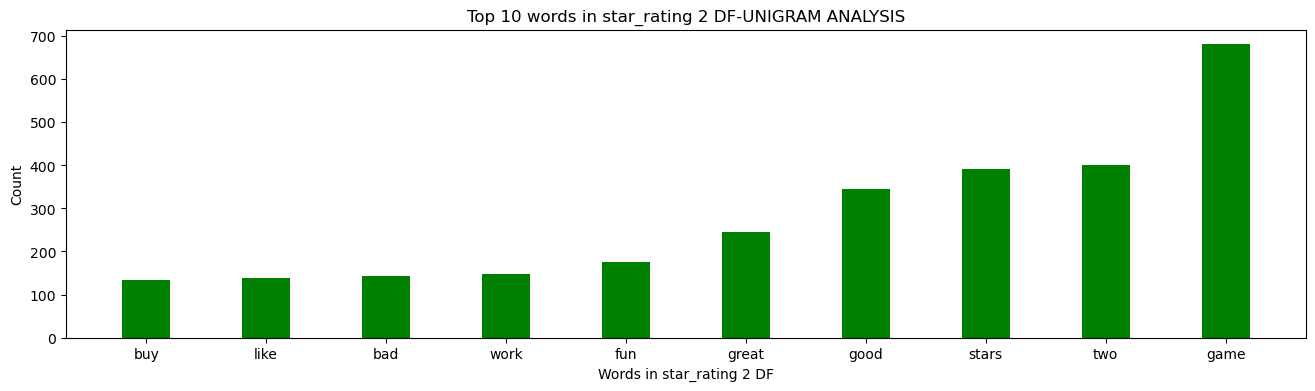

In [96]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-UNIGRAM ANALYSIS")
plt.show()

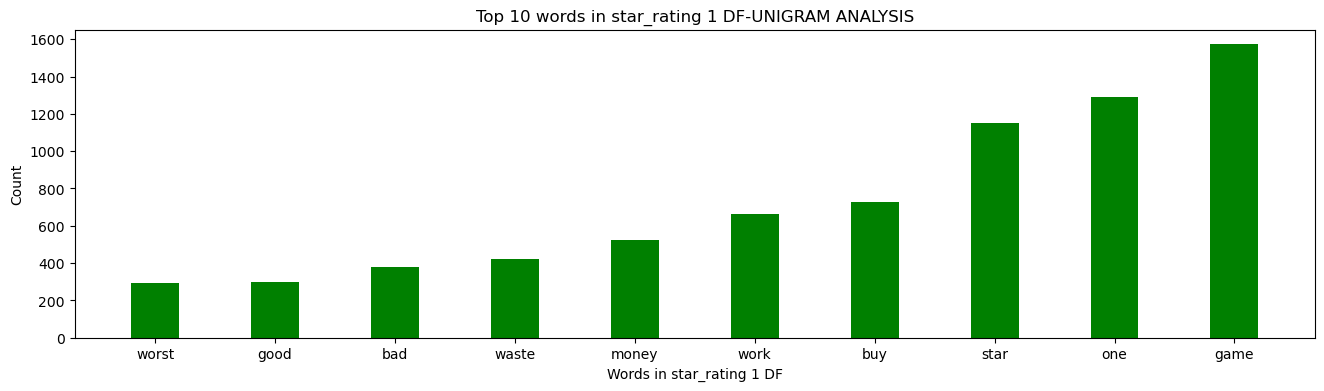

In [97]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-UNIGRAM ANALYSIS")
plt.show()

In [1]:
# Alternative directly use ngrams package --> only works with single string
# get individual words
# tokenized = text.split()

# for text in df_train[df_train.star_rating==5].review_headline_wo_punctuations:
#     print(text)
#     tokenized = text.split()
#     print(tokenized)
#     for word in tokenized:
#         rating_5_v2['word']
#         print(ngrams(tokenized, 2))
#     stop

In [2]:
# test = ngrams(tokenized, 2)
# collections.Counter(test)

In [134]:
# define functions for bigrams and trigrams analysis
def generate_N_grams_df(df, column_y, value_y, column_x, n_grams, dict_result):
    for text in df[df[column_y] == value_y][column_x]:
        ngram = generate_N_grams(text, n_grams)
        if len(ngram) == 1 and ngram[0] == "": # skip empty string
            pass
        if len(generate_N_grams(text, n_grams)) < n_grams:
            dict_result[text]+=1
        else:
            for word in generate_N_grams(text, n_grams).split(" "):
                dict_result[word]+=1
    
    df_result = pd.DataFrame.from_dict(dict_result, orient = 'index')
    df_result = df_result.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
    
    return df_result

#### create bigrams

In [142]:
from collections import defaultdict

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [143]:
df_rating_5 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 5, 
                    column_x = "review_headline_wo_punctuations", n_grams = 2, 
                    dict_result = rating_5)

In [144]:
df_rating_4 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 4, 
                    column_x = "review_headline_wo_punctuations", n_grams = 2, 
                    dict_result = rating_5)

In [145]:
df_rating_3 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 3, 
                    column_x = "review_headline_wo_punctuations", n_grams = 2, 
                    dict_result = rating_5)

In [146]:
df_rating_2 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 2, 
                    column_x = "review_headline_wo_punctuations", n_grams = 2, 
                    dict_result = rating_5)

In [147]:
df_rating_1 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 1, 
                    column_x = "review_headline_wo_punctuations", n_grams = 2, 
                    dict_result = rating_5)

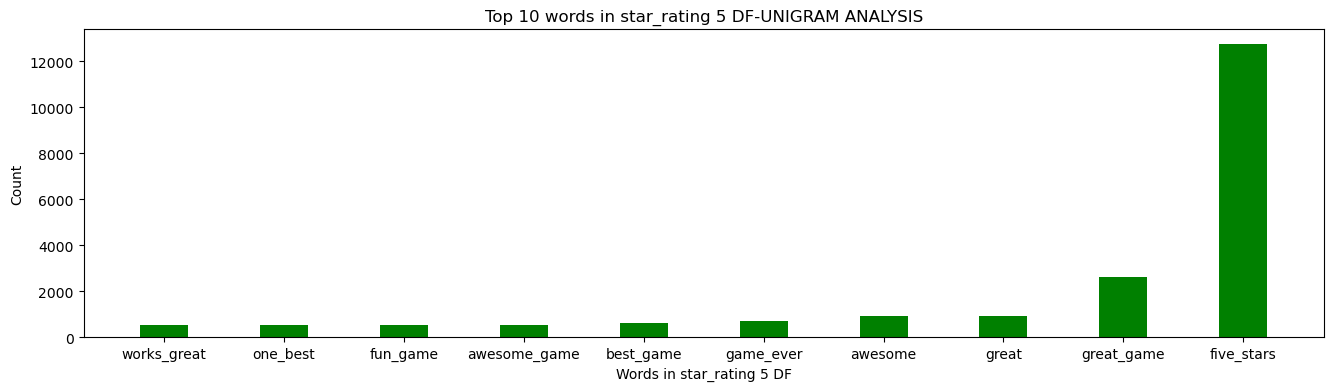

In [148]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-UNIGRAM ANALYSIS")
plt.show()

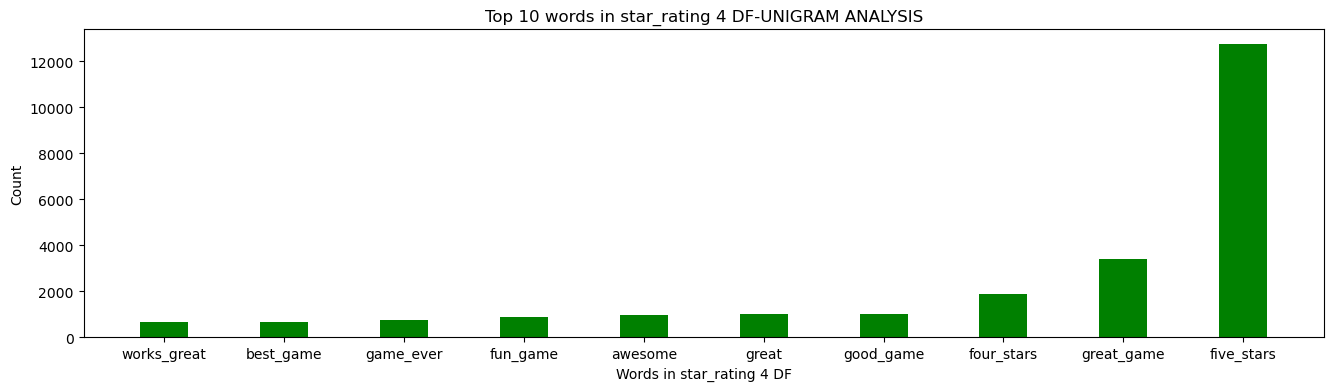

In [149]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-UNIGRAM ANALYSIS")
plt.show()

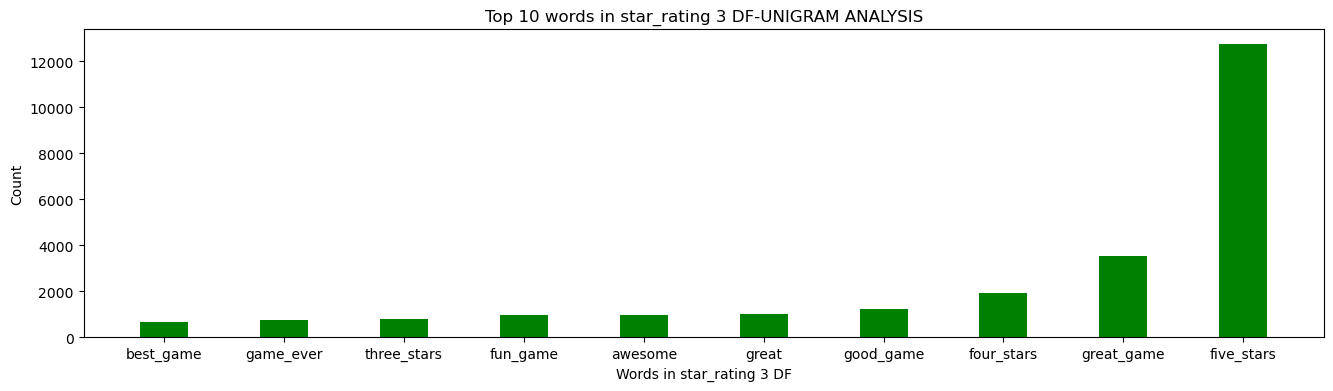

In [150]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-UNIGRAM ANALYSIS")
plt.show()

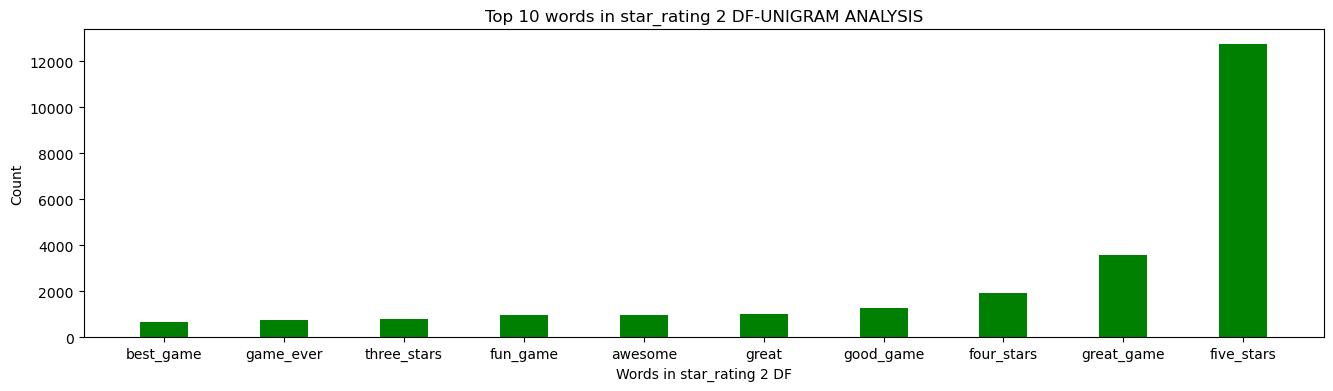

In [151]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-UNIGRAM ANALYSIS")
plt.show()

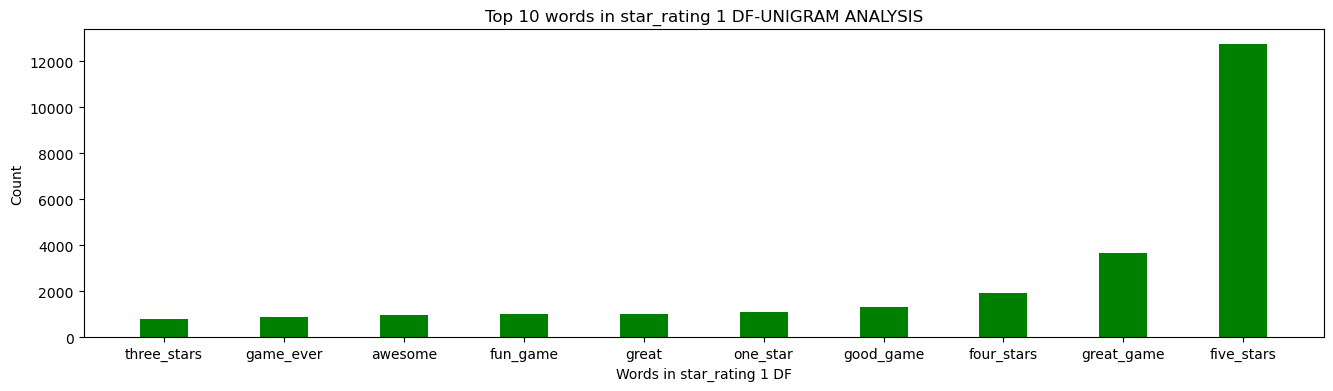

In [152]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-UNIGRAM ANALYSIS")
plt.show()

#### create trigrams

In [158]:
from collections import defaultdict

rating_5 = defaultdict(int)
rating_4 = defaultdict(int)
rating_3 = defaultdict(int)
rating_2 = defaultdict(int)
rating_1 = defaultdict(int)

In [159]:
df_rating_5 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 5, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_5)

In [160]:
df_rating_4 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 4, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_5)

In [161]:
df_rating_3 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 3, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_5)

In [162]:
df_rating_2 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 2, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_5)

In [163]:
df_rating_1 = generate_N_grams_df(df = df_train, column_y = "star_rating", value_y = 1, 
                    column_x = "review_headline_wo_punctuations", n_grams = 3, 
                    dict_result = rating_5)

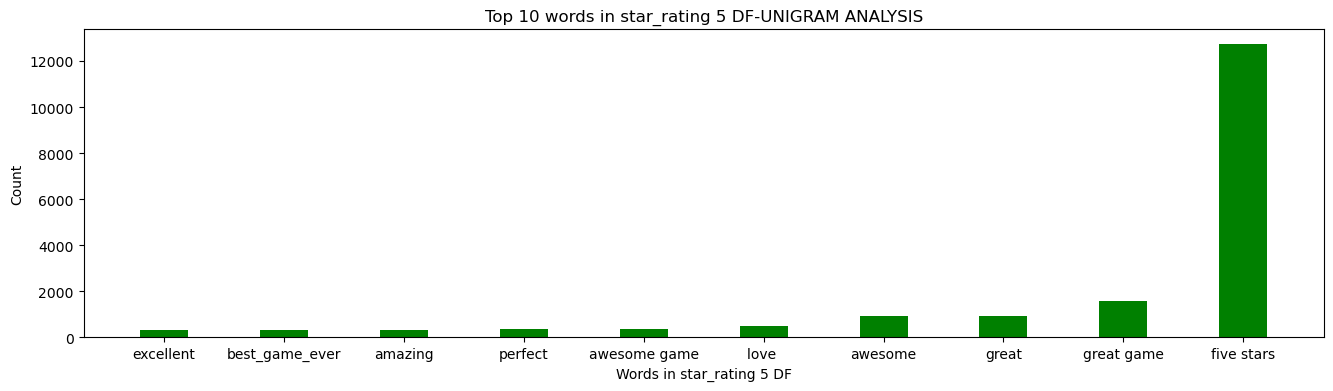

In [164]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_5['index'][-10:], df_rating_5['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 5 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 5 DF-UNIGRAM ANALYSIS")
plt.show()

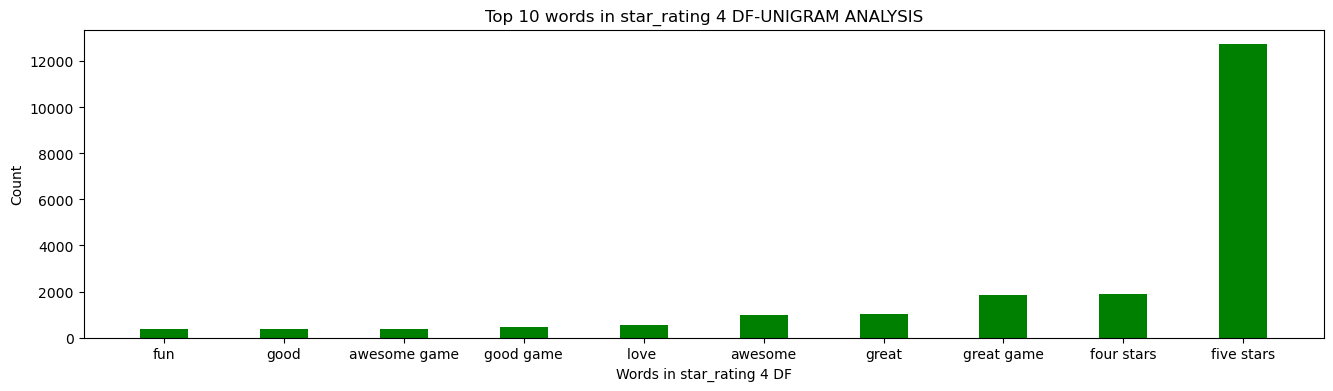

In [165]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_4['index'][-10:], df_rating_4['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 4 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 4 DF-UNIGRAM ANALYSIS")
plt.show()

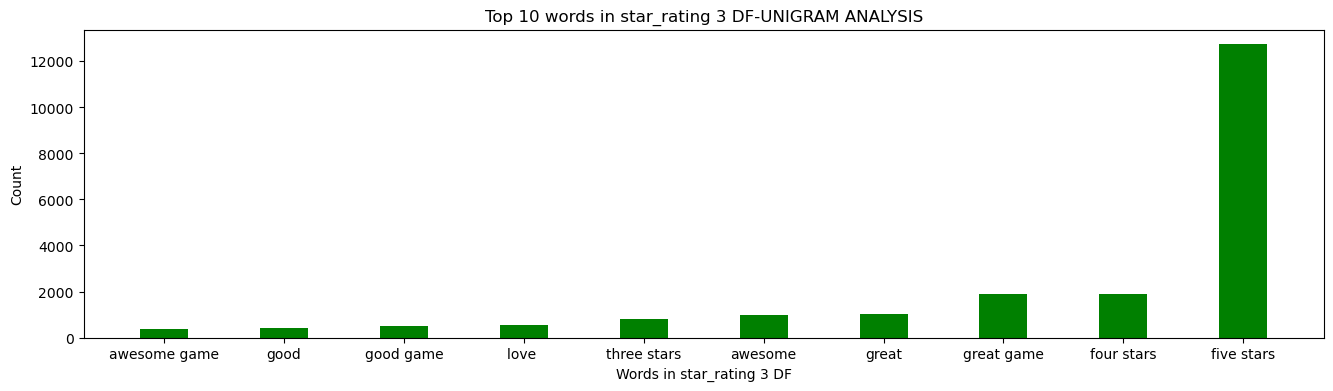

In [166]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_3['index'][-10:], df_rating_3['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 3 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 3 DF-UNIGRAM ANALYSIS")
plt.show()

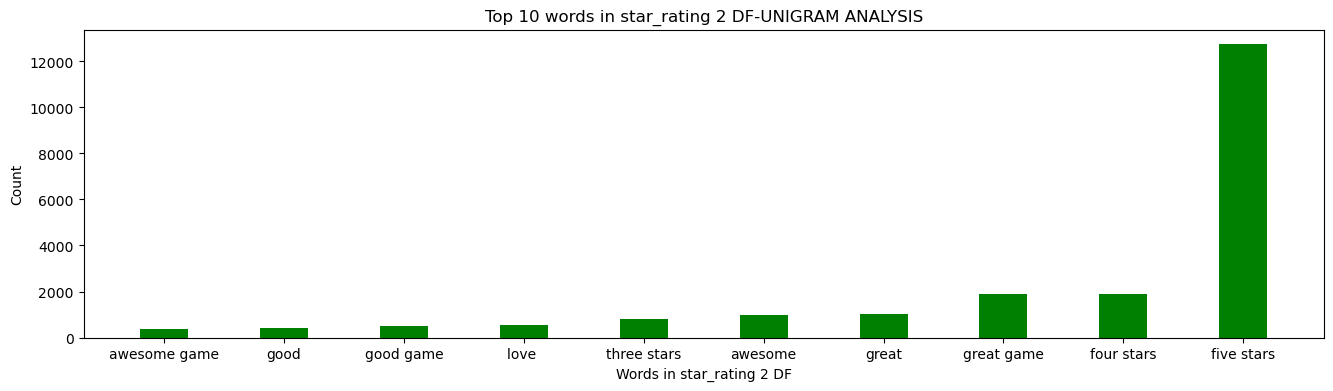

In [167]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_2['index'][-10:], df_rating_2['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 2 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 2 DF-UNIGRAM ANALYSIS")
plt.show()

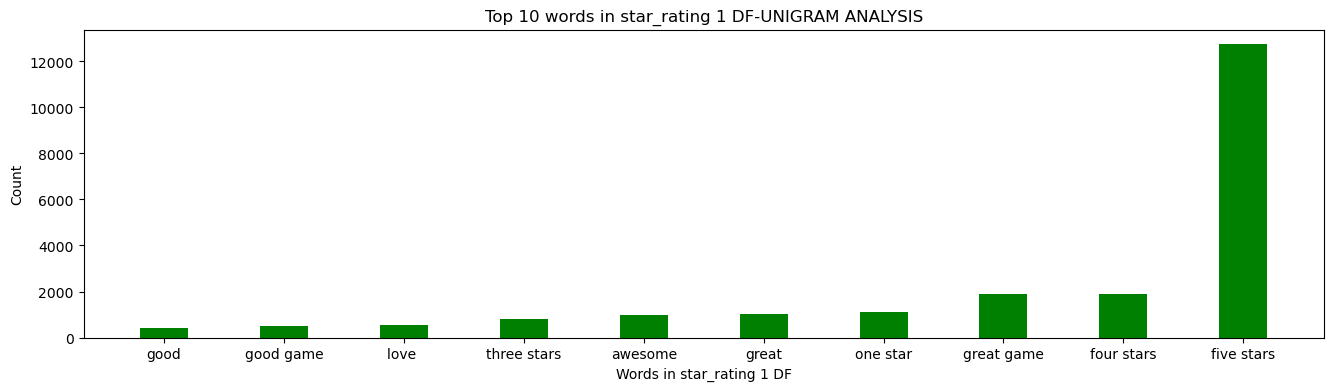

In [168]:
plt.figure(1,figsize=(16,4))
plt.bar(df_rating_1['index'][-10:], df_rating_1['# words'][-10:], color ='green', width = 0.4)
plt.xlabel("Words in star_rating 1 DF")
plt.ylabel("Count")
plt.title("Top 10 words in star_rating 1 DF-UNIGRAM ANALYSIS")
plt.show()

#### To-Do <br>
the result of trigram makes most sense. <br>
As next step, a matrix for further ML-analysis (for example naive bayes [Link](https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a))



In [214]:
from sklearn.feature_extraction.text import CountVectorizer

In [215]:
df_test.head()

,review_headline,star_rating,review_headline_wo_punctuations,review_headline_ngrams
0,Awesome,5,Awesome,Awesome
1,Huge Disappointment.,1,Huge Disappointment,Huge_Disappointment
2,one of the best games ive ever played...,5,one of the best games ive ever played,one_of_the of_the_best the_best_games best_gam...
3,Murray The Miser Owes Me Cash,5,Murray The Miser Owes Me Cash,Murray_The_Miser The_Miser_Owes Miser_Owes_Me ...
4,Greatest Christmas gift,5,Greatest Christmas gift,Greatest_Christmas_gift


In [216]:
df_test['review_headline_ngrams'] = df_test['review_headline_wo_punctuations'].apply(lambda x: generate_N_grams(x, 3))

In [217]:
df_test.head()

,review_headline,star_rating,review_headline_wo_punctuations,review_headline_ngrams
0,Awesome,5,Awesome,Awesome
1,Huge Disappointment.,1,Huge Disappointment,Huge_Disappointment
2,one of the best games ive ever played...,5,one of the best games ive ever played,one_of_the of_the_best the_best_games best_gam...
3,Murray The Miser Owes Me Cash,5,Murray The Miser Owes Me Cash,Murray_The_Miser The_Miser_Owes Miser_Owes_Me ...
4,Greatest Christmas gift,5,Greatest Christmas gift,Greatest_Christmas_gift


In [218]:
df_test_final = df_test[['star_rating', 'review_headline_ngrams']]

In [219]:
corpus = df_test_final.review_headline_ngrams.values.tolist()
corpus[0:5]

['Awesome',
 'Huge_Disappointment',
 'one_of_the of_the_best the_best_games best_games_ive games_ive_ever ive_ever_played',
 'Murray_The_Miser The_Miser_Owes Miser_Owes_Me Owes_Me_Cash',
 'Greatest_Christmas_gift']

In [208]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())

['a_a_really', 'a_aaa_title', 'a_ac_beta', 'a_actual_game', 'a_actual_owner', 'a_add_on', 'a_addicting_game', 'a_adequate_substitute', 'a_allright_game', 'a_amazon_packing', 'a_and_year', 'a_arcade_game', 'a_av_television', 'a_avid_strategy', 'a_awesome_case', 'a_awesome_deal', 'a_awesome_game', 'a_awesome_job', 'a_awsome_game', 'a_baby_and', 'a_baby_this', 'a_back_seat', 'a_backgammon_review', 'a_bad_attitude', 'a_bad_bargain', 'a_bad_batch', 'a_bad_budget', 'a_bad_choice', 'a_bad_day', 'a_bad_deal', 'a_bad_ending', 'a_bad_expantion', 'a_bad_experience', 'a_bad_game', 'a_bad_investment', 'a_bad_item', 'a_bad_little', 'a_bad_name', 'a_bad_port', 'a_bad_prcie', 'a_bad_price', 'a_bad_product', 'a_bad_purchase', 'a_bad_rap', 'a_bad_rating', 'a_bad_replacement', 'a_bad_rpg', 'a_bad_rts', 'a_bad_season', 'a_bad_series', 'a_bad_silicone', 'a_bad_single', 'a_bad_spill', 'a_bad_spyro', 'a_bad_start', 'a_bad_story', 'a_bad_strategic', 'a_bad_thing', 'a_bad_unit', 'a_bad_version', 'a_bad_way', '

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [221]:
len(vectorizer.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


130258

In [229]:
# define functions for bigrams and trigrams analysis
def generate_N_grams_df_all(df, column_x, n_grams, dict_result):
    for text in df[column_x]:
        ngram = generate_N_grams(text, n_grams)
        if len(ngram) == 1 and ngram[0] == "": # skip empty string
            pass
        if len(generate_N_grams(text, n_grams)) < n_grams:
            dict_result[text]+=1
        else:
            for word in generate_N_grams(text, n_grams).split(" "):
                dict_result[word]+=1
    
    df_result = pd.DataFrame.from_dict(dict_result, orient = 'index')
    df_result = df_result.rename(columns={0:'# words'}).sort_values(by=['# words']).reset_index()
    
    return df_result 

In [231]:
dict_result_all = defaultdict(int)
df_result_all = generate_N_grams_df_all(df = df_test, column_x = "review_headline_wo_punctuations", n_grams = 3, dict_result = dict_result_all)

In [238]:
df_result_all.describe()

,# words
count,143594.000000
mean,1.466148
std,22.937704
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8400.000000


In [237]:
df_result_all[df_result_all['# words']<=5].count()

index      141269
# words    141269
dtype: int64

In [239]:
# drop the tokens which appear fewer than &including 5 times
df_result_all = df_result_all[df_result_all['# words'] > 5]

In [240]:
df_result_all.describe()

,# words
count,2325.000000
mean,21.176774
std,179.156467
min,6.000000
25%,7.000000
50%,9.000000
75%,15.000000
max,8400.000000


In [242]:
df_result_all.head()

,index,# words
141269,Awsome_game,6
141270,game_doesn_t,6
141271,If_I_could,6
141272,on_Wii_U,6
141273,quite_what_I,6


In [257]:
feature_filter = df_result_all['index'].values.tolist()

In [258]:
vectorizer = CountVectorizer(vocabulary = feature_filter)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names()[0:5])
print(len(vectorizer.get_feature_names()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


['Awsome_game', 'game_doesn_t', 'If_I_could', 'on_Wii_U', 'quite_what_I']
2325


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [253]:
# problem > too many features --> not enough memory --> drop featurew with number of appearance in the db fewer than 5 times
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [269]:
X.shape

(76995, 2325)

In [270]:
df_test_final.shape

(76995, 2)

In [261]:
# # test matrix
# for row in X.toarray():
#     print(sum(row))

1
0
3
0
0
0
0
0
0
0
0
1
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
3
0
0
0
0
0
0
0
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
2
0
1
0
0
1
0
0
1
0
0
0
1
1
0
1
0
1
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
1
2
1
2
0
3
4
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
1
3
0
0
0
1
0
1
0
0
4
0
0
0
0
1
0
0
0
0
2
1
0
0
0
0
0
0
0
0
0
1
1
0
0
1
0
2
0
2
0
0
2
4
0
1
0
0
1
1
1
1
0
0
0
1
0
3
2
0
1
2
0
0
1
1
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
1
0
0
0
4
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
1
0
0
2
0
0
0
1
0
0
1
0
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
1
0
2
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
1
0
1
0
0
2
2
0
0
0
4
1
0
1
0
1
0
1
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
1
3
0
0
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
1
0
1
0
0
0
1
1
0
8
0
1
0
0
0
0
0
1
0
1
0
0
0
0
1
2
0
0
0
1
1
0
4
0
1
0
0
0
0
1
0
1
1
0
0
0
3
0
0
1
0
1
2
0
0
1
0
0
0
0
0
0
0
0
0
0
2
1
1
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
0
0
2
0
0
0
2


1
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
0
0
0
1
0
1
0
0
0
0
0
2
0
2
0
1
0
1
0
0
1
1
1
0
2
0
0
1
0
0
0
1
0
1
0
0
3
0
1
0
1
1
0
3
0
2
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
2
1
0
0
0
0
1
0
3
1
0
4
1
0
1
0
0
0
0
1
1
0
0
0
0
1
0
0
0
0
3
0
0
3
0
1
0
1
0
3
0
0
0
0
0
0
1
0
1
5
0
0
3
0
0
2
5
1
0
1
0
1
3
0
0
2
0
0
0
0
0
0
1
0
0
0
2
0
0
0
0
1
0
0
3
0
0
1
1
0
1
0
1
0
0
1
0
0
0
0
1
0
0
0
0
0
1
0
1
0
2
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
2
2
2
0
0
0
1
0
0
1
0
0
1
0
0
3
0
0
2
0
0
0
0
3
0
0
0
1
1
0
3
0
0
1
0
0
0
0
1
0
1
1
0
0
1
0
1
1
2
0
1
0
2
0
1
1
0
0
2
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
3
0
4
0
0
0
1
0
0
0
1
1
1
1
0
1
1
1
2
0
0
1
0
0
2
0
0
2
0
0
1
0
1
0
1
1
0
0
0
1
1
0
0
1
0
1
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
0
4
0
0
0
3
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
1
0
0
2
0
2
0
0
0
0
0
0
0
0
3
0
0
0
0
2
0
1
0
5
1
0
0
0
0
0
0
0
1
0
0
1
3
1
3
1
0
1
0
0
6
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
1
0
1
0
0
2
0
2
0
0
0
0
1
1
0
1
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
1
0
0


KeyboardInterrupt: 

In [265]:
# count = 0
# for i in X.toarray()[0]:
#     count+=1
#     if i != 0:
#         print(count)
#         break

2303


In [267]:
# feature_filter[2302]

'awesome'

##### train model

In [273]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X = df_test_final

In [ ]:
# Build the model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model using the training data
model.fit(X, df_test_final.star_rating)

In [276]:
# test
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
text_categories = data.target_names

In [ ]:
data

## Reference
1. https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/ <br>
2. https://www.kaggle.com/code/rtatman/tutorial-getting-n-grams/notebook <br>
3. https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a